Base de Dados: https://www.tesourotransparente.gov.br/ckan/dataset

In [8]:
import pandas as pd
import yfinance as yf
import cufflinks as cf
cf.go_offline()
from plotly.subplots import make_subplots

# pd.set_option("display.max_colwidth", 150)
# pd.set_option("display.min_rows", 20)

import matplotlib
# matplotlib.style.use('seaborn-darkgrid')
matplotlib.rcParams['figure.figsize'] = (18,8)
import plotly.express as px

import plotly.graph_objects as go

import plotly.io as pio
pio.renderers.default = 'png'  ## comentar se quiser grafico interativo

In [9]:
def busca_titulos(tipo=None):
  url = 'https://www.tesourotransparente.gov.br/ckan/dataset/df56aa42-484a-4a59-8184-7676580c81e3/resource/796d2059-14e9-44e3-80c9-2d9e30b405c1/download/PrecoTaxaTesouroDireto.csv'
  df  = pd.read_csv(url, sep=';', decimal=',')
  df['Data Vencimento'] = pd.to_datetime(df['Data Vencimento'], dayfirst=True)
  df['Data Base']       = pd.to_datetime(df['Data Base'], dayfirst=True)
  multi_indice = pd.MultiIndex.from_frame(df.iloc[:, :3])
  df = df.set_index(multi_indice).iloc[: , 3:]  
  if tipo is None:
    return df.sort_index()
  else:
      return df[df.index.get_level_values(0) == tipo]

busca por tipo

In [10]:
busca_titulos('Tesouro Selic')

Taxa Compra Manha  Taxa Venda Manha  \
Tipo Titulo   Data Vencimento Data Base                                         
Tesouro Selic 2011-03-16      2008-04-09              -0.04             -0.01   
              2009-03-18      2008-04-09              -0.06             -0.05   
              2008-06-18      2008-04-09              -0.07             -0.06   
              2014-03-07      2008-04-09              -0.02              0.02   
              2013-03-07      2008-04-09              -0.02              0.02   
...                                                     ...               ...   
                              2008-12-17               0.00              0.04   
              2009-03-18      2008-12-17               0.00              0.01   
              2010-03-17      2008-12-17               0.00              0.02   
              2011-03-16      2008-12-17               0.00              0.03   
              2012-03-07      2008-12-17               0.00              0.04   

                                          PU Compra Manha  PU Venda Manha  \
Tipo Titulo   Data Vencimento Data Base                                     
Tesouro Selic 2011-03-16      2008-04-09          3415.04         3412.05   
              2009-03-18      2008-04-09          3412.98         3412.66   
              2008-06-18      2008-04-09          3411.49         3411.42   
              2014-03-07      2008-04-09          3415.08         3407.03   
              2013-03-07      2008-04-09          3414.39         3407.72   
...                                                   ...             ...   
                              2008-12-17          3711.63         3705.42   
              2009-03-18      2008-12-17          3711.63         3711.54   
              2010-03-17      2008-12-17          3711.63         3710.72   
              2011-03-16      2008-12-17          3711.63         3709.16   
              2012-03-07      2008-12-17          3711.63         3706.89   

                                          PU Base Manha  
Tipo Titulo   Data Vencimento Data Base                  
Tesouro Selic 2011-03-16      2008-04-09        3410.61  
              2009-03-18      2008-04-09        3411.22  
              2008-06-18      2008-04-09        3409.99  
              2014-03-07      2008-04-09        3405.59  
              2013-03-07      2008-04-09        3406.27  
...                                                 ...  
                              2008-12-17        3703.52  
              2009-03-18      2008-12-17        3709.64  
              2010-03-17      2008-12-17        3708.82  
              2011-03-16      2008-12-17        3707.26  
              2012-03-07      2008-12-17        3704.99  

[19022 rows x 5 columns]

busca todos

In [11]:
titulos = busca_titulos()
titulos

Taxa Compra Manha  \
Tipo Titulo    Data Vencimento Data Base                       
Tesouro Educa+ 2030-12-15      2023-08-01               5.06   
                               2023-08-02               5.05   
                               2023-08-03               5.02   
                               2023-08-04               5.02   
                               2023-08-07               4.98   
...                                                      ...   
Tesouro Selic  2029-03-01      2024-08-14               0.15   
                               2024-08-15               0.15   
                               2024-08-16               0.15   
                               2024-08-19               0.15   
                               2024-08-20               0.15   

                                           Taxa Venda Manha  PU Compra Manha  \
Tipo Titulo    Data Vencimento Data Base                                       
Tesouro Educa+ 2030-12-15      2023-08-01              5.18          3248.87   
                               2023-08-02              5.17          3251.07   
                               2023-08-03              5.14          3256.24   
                               2023-08-04              5.14          3257.13   
                               2023-08-07              5.10          3263.78   
...                                                     ...              ...   
Tesouro Selic  2029-03-01      2024-08-14              0.16         15114.98   
                               2024-08-15              0.16         15119.91   
                               2024-08-16              0.16         15124.98   
                               2024-08-19              0.16         15129.79   
                               2024-08-20              0.16         15135.28   

                                           PU Venda Manha  PU Base Manha  
Tipo Titulo    Data Vencimento Data Base                                  
Tesouro Educa+ 2030-12-15      2023-08-01         3230.41        3230.41  
                               2023-08-02         3232.62        3232.62  
                               2023-08-03         3237.76        3237.76  
                               2023-08-04         3238.49        3238.49  
                               2023-08-07         3245.29        3245.29  
...                                                   ...            ...  
Tesouro Selic  2029-03-01      2024-08-14        15102.09       15102.09  
                               2024-08-15        15107.03       15107.03  
                               2024-08-16        15112.11       15112.11  
                               2024-08-19        15116.92       15116.92  
                               2024-08-20        15122.41       15122.41  

[146599 rows x 5 columns]

tipos

In [12]:
titulos.index.droplevel(level=1).droplevel(level=1).drop_duplicates().to_list()

['Tesouro Educa+',
 'Tesouro IGPM+ com Juros Semestrais',
 'Tesouro IPCA+',
 'Tesouro IPCA+ com Juros Semestrais',
 'Tesouro Prefixado',
 'Tesouro Prefixado com Juros Semestrais',
 'Tesouro Renda+ Aposentadoria Extra',
 'Tesouro Selic']

historico das taxas do tesouro  IPCA+ com Juros Semestrai 2035

In [13]:
titulos.loc[('Tesouro IPCA+ com Juros Semestrais','2035-01-01'):('Tesouro IPCA+ com Juros Semestrais','2035-12-30')]

Taxa Compra Manha  \
Tipo Titulo                        Data Vencimento Data Base                       
Tesouro IPCA+ com Juros Semestrais 2035-05-15      2006-04-12               8.04   
                                                   2006-04-13               8.05   
                                                   2006-04-17               8.09   
                                                   2006-04-18               8.10   
                                                   2006-04-19               8.09   
...                                                                          ...   
                                                   2024-08-14               5.82   
                                                   2024-08-15               5.85   
                                                   2024-08-16               5.82   
                                                   2024-08-19               5.88   
                                                   2024-08-20               6.02   

                                                               Taxa Venda Manha  \
Tipo Titulo                        Data Vencimento Data Base                      
Tesouro IPCA+ com Juros Semestrais 2035-05-15      2006-04-12              8.14   
                                                   2006-04-13              8.15   
                                                   2006-04-17              8.19   
                                                   2006-04-18              8.20   
                                                   2006-04-19              8.19   
...                                                                         ...   
                                                   2024-08-14              5.94   
                                                   2024-08-15              5.97   
                                                   2024-08-16              5.94   
                                                   2024-08-19              6.00   
                                                   2024-08-20              6.14   

                                                               PU Compra Manha  \
Tipo Titulo                        Data Vencimento Data Base                     
Tesouro IPCA+ com Juros Semestrais 2035-05-15      2006-04-12          1279.73   
                                                   2006-04-13          1279.30   
                                                   2006-04-17          1274.17   
                                                   2006-04-18          1273.27   
                                                   2006-04-19          1275.19   
...                                                                        ...   
                                                   2024-08-14          4451.74   
                                                   2024-08-15          4442.73   
                                                   2024-08-16          4453.86   
                                                   2024-08-19          4434.85   
                                                   2024-08-20          4389.62   

                                                               PU Venda Manha  \
Tipo Titulo                        Data Vencimento Data Base                    
Tesouro IPCA+ com Juros Semestrais 2035-05-15      2006-04-12         1265.68   
                                                   2006-04-13         1265.27   
                                                   2006-04-17         1260.24   
                                                   2006-04-18         1259.37   
                                                   2006-04-19         1261.26   
...                                                                       ...   
                                                   2024-08-14         4410.22   
                                                   2024-08-15         4401.85   
             

In [14]:
hist = titulos.loc[('Tesouro IPCA+ com Juros Semestrais','2035-01-01'):('Tesouro IPCA+ com Juros Semestrais','2035-12-30')].reset_index(level=[0, 1], drop=True)
hist

,Taxa Compra Manha,Taxa Venda Manha,PU Compra Manha,PU Venda Manha,PU Base Manha
Data Base,,,,,
2006-04-12,8.04,8.14,1279.73,1265.68,1265.11
2006-04-13,8.05,8.15,1279.30,1265.27,1264.40
2006-04-17,8.09,8.19,1274.17,1260.24,1259.73
2006-04-18,8.10,8.20,1273.27,1259.37,1258.86
2006-04-19,8.09,8.19,1275.19,1261.26,1260.75
...,...,...,...,...,...
2024-08-14,5.82,5.94,4451.74,4410.22,4410.22
2024-08-15,5.85,5.97,4442.73,4401.85,4401.85
2024-08-16,5.82,5.94,4453.86,4412.81,4412.81


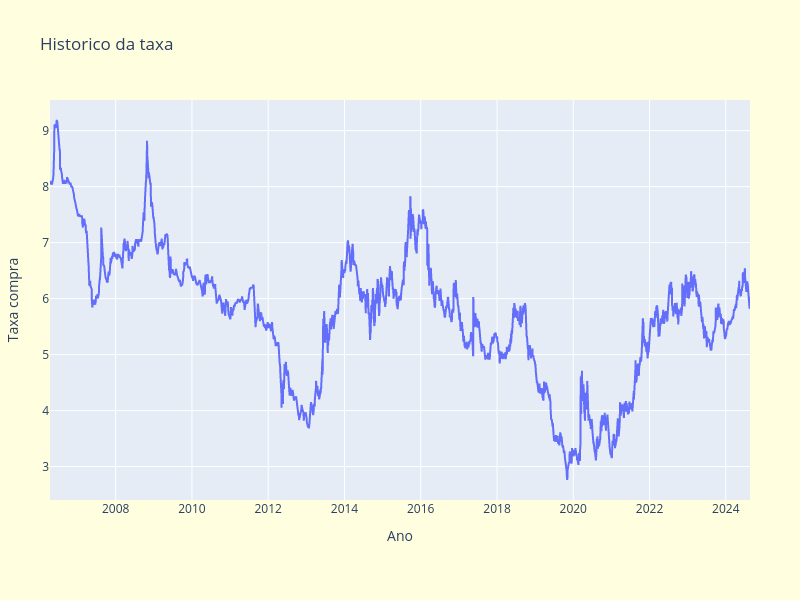

In [15]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=hist.index , y=hist['Taxa Compra Manha']))
fig.update_layout(
    title="Historico da taxa",
    xaxis_title="Ano",
    yaxis_title="Taxa compra",
    height=600,
    width=800,
    margin=dict(l=50, r=50, t=100, b=100),
    paper_bgcolor="LightYellow"
)
fig.show()

Vendas de titulos do tesouro

In [16]:
def vendas_tesouro(tipo=None):
  url = "https://www.tesourotransparente.gov.br/ckan/dataset/f0468ecc-ae97-4287-89c2-6d8139fb4343/resource/e5f90e3a-8f8d-4895-9c56-4bb2f7877920/download/VendasTesouroDireto.csv"
  df  = pd.read_csv(url, sep=';', decimal=',')
  df['Vencimento do Titulo'] = pd.to_datetime(df['Vencimento do Titulo'], dayfirst=True)
  df['Data Venda']       = pd.to_datetime(df['Data Venda'], dayfirst=True)
  multi_indice = pd.MultiIndex.from_frame(df.iloc[:, :3])
  df = df.set_index(multi_indice).iloc[: , 3:]  
  df.sort_index(inplace=True)
  if tipo is None:
    return df
  else:
    return df[df.index.get_level_values(0) == tipo]


In [17]:
vendas = vendas_tesouro()
vendas


PU  Quantidade  \
Tipo Titulo    Vencimento do Titulo Data Venda                             
Tesouro Educa+ 2030-12-15           2023-08-02   3248.250572      331.84   
                                    2023-08-03   3250.646532      183.44   
                                    2023-08-04   3260.006540      157.49   
                                    2023-08-07   3260.737100      360.67   
                                    2023-08-08   3263.770709      227.79   
...                                                      ...         ...   
Tesouro Selic  2029-03-01           2024-08-01  15054.968362     4396.64   
                                    2024-08-02  15061.051987     5335.49   
                                    2024-08-05  15067.131072     5256.26   
                                    2024-08-06  15073.328983     5265.76   
                                    2024-08-07  15079.476853     5614.51   

                                                      Valor  
Tipo Titulo    Vencimento do Titulo Data Venda               
Tesouro Educa+ 2030-12-15           2023-08-02   1077899.46  
                                    2023-08-03    596298.59  
                                    2023-08-04    513418.42  
                                    2023-08-07   1176050.04  
                                    2023-08-08    743454.32  
...                                                     ...  
Tesouro Selic  2029-03-01           2024-08-01  66191276.09  
                                    2024-08-02  80358092.26  
                                    2024-08-05  79196758.36  
                                    2024-08-06  79372532.82  
                                    2024-08-07  84663873.58  

[81514 rows x 3 columns]

In [18]:
selic= vendas_tesouro('Tesouro Selic').reset_index(level=[0, 1], drop=True)

In [19]:
selic

,PU,Quantidade,Valor
Data Venda,,,
2002-01-07,1263.007692,2.60,3283.81
2002-01-08,1263.900000,7.60,9605.64
2002-01-09,1264.790000,6.00,7588.74
2002-01-11,1266.821052,3.80,4813.91
2002-01-14,1267.707500,4.00,5070.83
...,...,...,...
2024-08-01,15054.968362,4396.64,66191276.09
2024-08-02,15061.051987,5335.49,80358092.26
2024-08-05,15067.131072,5256.26,79196758.36


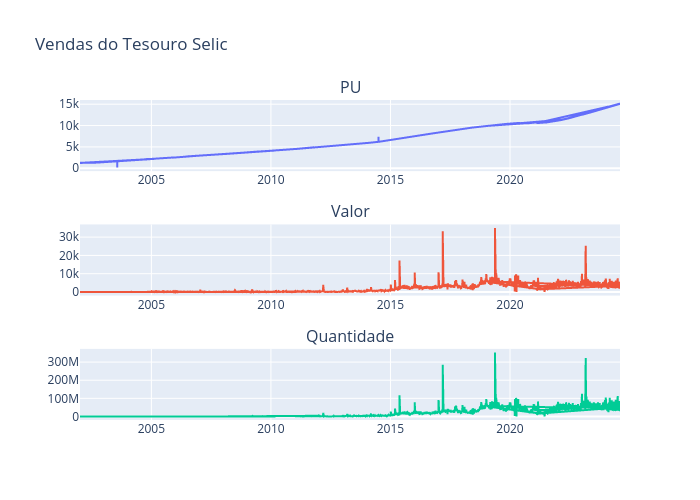

In [20]:
fig = make_subplots(rows=3, cols=1, subplot_titles=("PU", "Valor" , 'Quantidade'))

# Adicionando os traces aos subplots
fig.add_trace(go.Scatter(x=selic.index, y=selic['PU'], mode='lines', name='Dados 1'), row=1, col=1)
fig.add_trace(go.Scatter(x=selic.index, y=selic['Quantidade'], mode='lines', name='Dados 2'), row=2, col=1)
fig.add_trace(go.Scatter(x=selic.index, y=selic['Valor'], mode='lines', name='Dados 2'), row=3, col=1)

# Configurando o layout
fig.update_layout(title="Vendas do Tesouro Selic", showlegend=False)



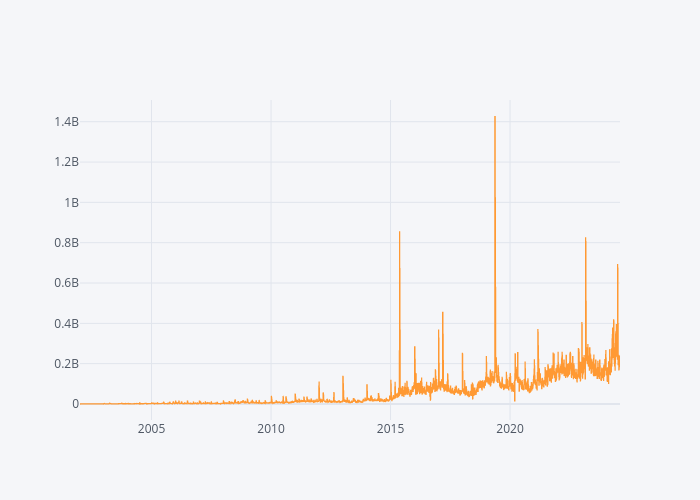

In [21]:
vendas['Valor'].groupby('Data Venda').sum().iplot()

recompra -- títulos resgatados antes do vencimento

In [22]:
def recompras():
  url = "https://www.tesourotransparente.gov.br/ckan/dataset/f30db6e4-6123-416c-b094-be8dfc823601/resource/30c2b3f5-6edd-499a-8514-062bfda0f61a/download/RecomprasTesouroDireto.csv"
  df  = pd.read_csv(url, sep=';', decimal=',')
  df['Vencimento do Titulo'] = pd.to_datetime(df['Vencimento do Titulo'], dayfirst=True)
  df['Data Resgate']       = pd.to_datetime(df['Data Resgate'], dayfirst=True)
  multi_indice = pd.MultiIndex.from_frame(df.iloc[:, :2])
  df = df.set_index(multi_indice).iloc[: , 2:]  
  return df.sort_index()

In [23]:
resgate = recompras()
resgate

Data Resgate  Quantidade        Valor
Tipo Titulo    Vencimento do Titulo                                      
Tesouro Educa+ 2030-12-15             2023-10-02        2.22      7098.90
               2030-12-15             2023-11-30        0.88      2865.17
               2030-12-15             2023-10-04        4.65     14775.77
               2030-12-15             2023-10-25        1.11      3535.68
               2030-12-15             2023-11-13       51.08    163679.92
...                                          ...         ...          ...
Tesouro Selic  2029-03-01             2023-06-28     1122.91  14933150.75
               2029-03-01             2023-04-20      960.97  12458767.92
               2029-03-01             2023-10-27     1587.32  22018341.74
               2029-03-01             2023-06-12     1677.77  22154990.39
               2029-03-01             2023-04-27      828.16  10753043.33

[72158 rows x 3 columns]

In [24]:
selic = resgate.loc['Tesouro Selic']
selic

,Data Resgate,Quantidade,Valor
Vencimento do Titulo,,,
2005-02-16,2005-01-20,20.60,44929.63
2005-02-16,2005-01-27,93.20,203952.36
2005-02-16,2005-02-03,20.60,45229.97
2005-02-16,2005-02-10,24.00,52800.48
2005-02-16,2005-01-06,10.60,22969.46
...,...,...,...
2029-03-01,2023-06-28,1122.91,14933150.75
2029-03-01,2023-04-20,960.97,12458767.92
2029-03-01,2023-10-27,1587.32,22018341.74


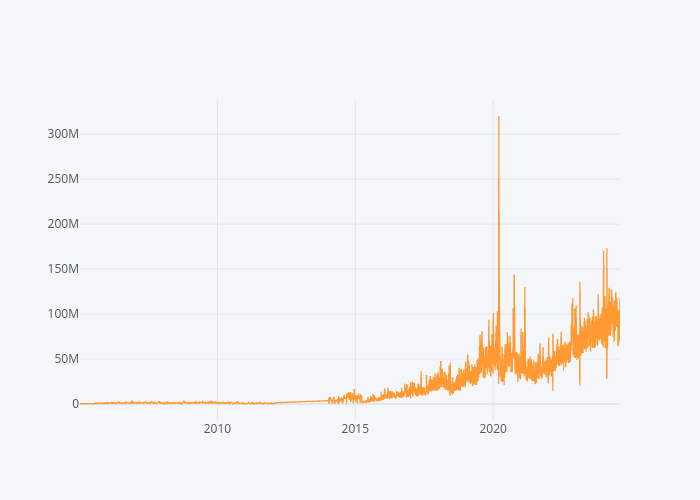

In [25]:
selic.groupby('Data Resgate').sum().Valor.iplot()

Venda semanal Tesouro Selic X retorno Ibov

In [26]:
selic_semanal = selic.reset_index(level=[0], drop=True)
selic_semanal.set_index('Data Resgate', inplace=True)
selic_semanal = selic_semanal.resample('W').sum()
selic_semanal

,Quantidade,Valor
Data Resgate,,
2005-01-09,109.40,2.363506e+05
2005-01-16,203.40,4.414528e+05
2005-01-23,263.60,5.713181e+05
2005-01-30,238.80,5.209024e+05
2005-02-06,83.00,1.814714e+05
...,...,...
2024-07-14,26358.06,3.955558e+08
2024-07-21,25076.96,3.770184e+08
2024-07-28,27197.80,4.097424e+08


In [27]:
ibov = yf.download('^BVSP')['Adj Close'].resample('W').last().pct_change()[1:]

[*********************100%%**********************]  1 of 1 completed


In [28]:
selic_ibov = pd.concat([selic_semanal['Valor'].pct_change()[1:], ibov], axis=1).dropna()[1:]
selic_ibov.columns = ['Recompra(%)', 'IBOV(%)']
selic_ibov

,Recompra(%),IBOV(%)
2005-01-23,0.294177,-0.044375
2005-01-30,-0.088244,0.006298
2005-02-06,-0.651621,0.073598
2005-02-13,-0.238354,0.036492
2005-02-20,1.648852,0.003187
...,...,...
2024-07-14,-0.230072,0.020829
2024-07-21,-0.046864,-0.009938
2024-07-28,0.086797,-0.000972
2024-08-04,0.032253,-0.012848


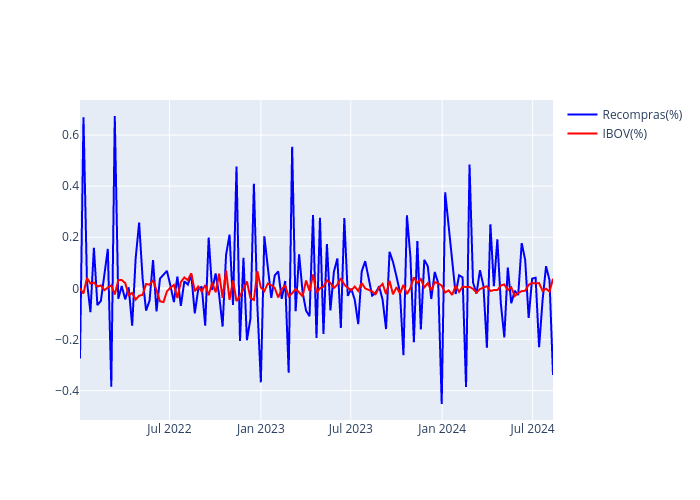

In [29]:
selic_ibov = selic_ibov[selic_ibov.index >'2022']

fig = go.Figure()
fig.add_trace(go.Scatter(name='Recompras(%)', x=selic_ibov.index,  y=selic_ibov['Recompra(%)'],marker=dict(color='blue')))
fig.add_trace(go.Scatter(name='IBOV(%)', x=selic_ibov.index,  y=selic_ibov['IBOV(%)'],marker=dict(color='red')))
fig.update_layout(barmode='group')
fig.show()
     

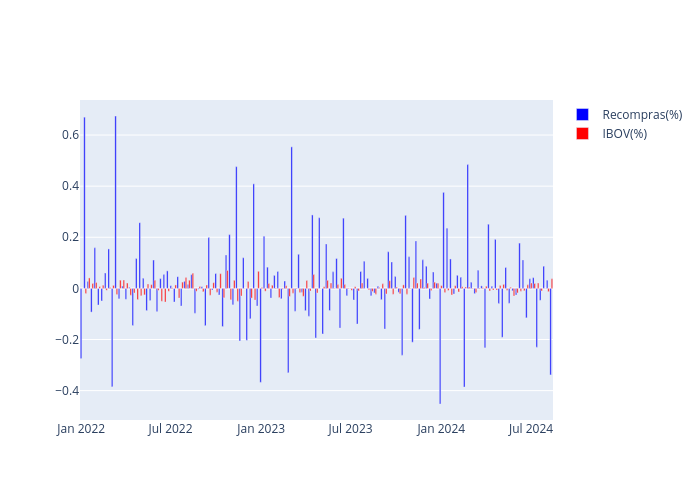

In [30]:

fig = go.Figure()
fig.add_trace(go.Bar(name='Recompras(%)', x=selic_ibov.index,  y=selic_ibov['Recompra(%)'],marker=dict(color='blue')))
fig.add_trace(go.Bar(name='IBOV(%)', x=selic_ibov.index,  y=selic_ibov['IBOV(%)'],marker=dict(color='red')))
fig.update_layout(barmode='group')
fig.show()
     